In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from tqdm import tqdm

In [2]:
!ls

coma_ascii.txt					      README.md
coma_ascii.txt.NDnet				      SDSS.csv
coma_ascii.txt.NDnet.MSC			      smooth0_sig3.jpg
coma_ascii.txt.NDnet_s5.up.NDskl		      smooth0_sig5.jpg
coma_ascii.txt.NDnet_s5.up.NDskl.S001.RaDecZ.a.NDskl  smooth1_sig3.jpg
disperse					      smooth1_sig5.jpg
disperse_02					      test_smooth.dat
DisPerSe.ipynb					      visual.ipynb
DR5_cluster-catalog_v1.1.fits


In [3]:
75 / 4200

0.017857142857142856

In [4]:
75 * 102 / 4200

1.8214285714285714

In [5]:
galaxies = pd.read_csv('SDSS.csv')

In [6]:
galaxies = galaxies.loc[galaxies['class'] == 'GALAXY']
galaxies = galaxies[['ra', 'dec', 'z']]
galaxies.columns = ['RA', 'DEC', 'Z']
galaxies

,RA,DEC,Z
0,146.71421,-1.041304,0.021275
1,146.71421,-1.041304,0.021222
2,146.91945,-0.990492,0.213925
3,146.74413,-0.652191,0.203783
6,146.85983,-0.808902,0.126554
...,...,...,...
5789190,146.13969,26.500868,0.903536
5789192,146.20911,26.557960,0.628224
5789194,146.09398,26.524402,0.845268
5789197,146.32252,26.549261,0.058894


In [7]:
coma_ra_int = (140, 260)
coma_dec_int = (-10, 70)
coma_z_int = (0.01, 0.036)

coma = galaxies[
        (coma_ra_int[0] < galaxies['RA']) & (galaxies['RA'] < coma_ra_int[1]) & \
        (coma_dec_int[0] < galaxies['DEC']) & (galaxies['DEC'] < coma_dec_int[1]) & \
        (coma_z_int[0] < galaxies['Z']) & (galaxies['Z'] < coma_z_int[1])
    ]
coma.reset_index(drop=True, inplace=True)

In [8]:
coma

,RA,DEC,Z
0,146.71421,-1.041304,0.021275
1,146.71421,-1.041304,0.021222
2,146.85676,-0.274040,0.022005
3,146.85676,-0.274040,0.021965
4,146.75170,-0.408392,0.035809
...,...,...,...
51343,146.30552,27.252910,0.033506
51344,146.81396,27.404972,0.011577
51345,147.33687,26.674080,0.022621
51346,145.51793,26.044850,0.033108


In [9]:
with open('coma_ascii.txt', 'w') as coma_f:
    coma_f.write('# ra dec z\n')
    for i in range(coma.shape[0]):
        t = coma.iloc[i]
        coma_f.write(f'{t.RA}\t{t.DEC}\t{t.Z}\n')

In [10]:
!disperse_02/bin/delaunay_3D coma_ascii.txt -btype smooth -smooth 1


reading coma_ascii.txt (ASCII) ... (50000 lines)
Initialized cosmo distances: Om=0.27 Ol=0.73 Ok=0.00 h=0.72 w=-1.00.
reading coma_ascii.txt (ASCII) ... done. (51348 lines)
Margin set to 0.102377 (actual size is ~23.5781).
Tesselating 51348 particles (3D) ... (+0 in boundary) done. (0.24s elapsed)
Circumsphere test was skipped.
Computing density ... done.
Building smooth boundaries (480 guards):  tesselation ...  generating ... cleaning up ... done. (+55551 particles)
Adding 55551 particles ... done.
Computing density ... done.
All done in 0.82 s.
Converting tesselation to NDnetwork ... done.
Smoothing 1 times ... done.
Will write network to file 'coma_ascii.txt.NDnet'.
All done.

Network was saved as : coma_ascii.txt.NDnet
   comment: 'Om=0.27 Ol=0.73 Ok=0.00 h=0.72 w=-1.00'
   3D-Network has 56922 vertices.
   periodicity: non-periodic.
   Available faces: 420590 1-F, 722104 2-F, 353562 3-F.
   Bounding box: x0=[-149.058,-136.295,-20.1172],
                 delta=[146.469,230.307,15

In [11]:
!disperse_02/bin/mse coma_ascii.txt.NDnet -upSkl -nsig 5


****** MSE v0.9.24 (64 bits) ******
Will read network from file 'coma_ascii.txt.NDnet'.
Loading 3D network from file "coma_ascii.txt.NDnet" ... done.
Computing 3-faces lists for vertice ... done.
Computing 2-faces lists for vertice ... done.
Building mask ... done. (15550 2-faces on boundary)
*********************************
Starting Morse-Smale complex computation.
Computing discrete gradient for 1553178 cells:
   Identifying (2,3)-cell pairs:
      Sorting 722104 2-cells (asc.) ... done.
      Computing MST ... (components) done.(657/353562 comp.)
      Computing discrete Gradient (657 comp.) ... done.
   Identifying (1,0)-cell pairs:
      Sorting 420590 1-cells (desc.) ... done.
      Computing MST ... (components) done.(5957/56922 comp.)
      Computing discrete Gradient (5957 comp.) ... done.
   Identifying (1,2)-cell pairs:
      Computing saddle-saddle DG ... done.
   Critical cells : 5957(+0) 0-cells, 17225(+17225) 1-cells, 11926(+11926) 2-cells, 657(+0) 3-cells.
Computing d

In [12]:
!disperse/bin/skelconv coma_ascii.txt.NDnet_s5.up.NDskl -smooth 1 -toRaDecZ -to NDskl_ascii

Will read skeleton from file 'coma_ascii.txt.NDnet_s5.up.NDskl'.
Loading 3D skeleton from file coma_ascii.txt.NDnet_s5.up.NDskl ... done.
Smoothing skeleton 1 times ... done.

Initialized cosmo distances: Om=0.27 Ol=0.73 Ok=0.00 h=0.72 w=-1.00.
Will write skeleton to file 'coma_ascii.txt.NDnet_s5.up.NDskl.S001.RaDecZ.a.NDskl'.
Saving 3D skeleton to ASCII file coma_ascii.txt.NDnet_s5.up.NDskl.S001.RaDecZ.a.NDskl ... done.


In [13]:
def read_skl_ascii_RaDecZ(file_name):
    cps = []
    fils = []
    with open(file_name) as f:
        s = ''
        while s != '[CRITICAL POINTS]':
            s = f.readline().strip()
        cp_num = int(f.readline().strip())
        for i in range(cp_num):
            cp = {}
            type_, ra, dec, z, _, _, _ = tuple(map(float, f.readline().split()))
            cp['RA'] = ra
            cp['DEC'] = dec
            cp['Z'] = z
            cp['type'] = int(type_)
            cps.append(cp)
            for i in range(int(f.readline())):
                f.readline()
        
        while s != '[FILAMENTS]':
            s = f.readline().strip()
        fil_num = int(f.readline())
        for i in range(fil_num):
            fil = {}
            cp1, cp2, sp_num = tuple(map(int, f.readline().split()))
            fil['CP1_id'] = cp1
            fil['CP2_id'] = cp2
            fil['sample_points'] = []
            for j in range(sp_num):
                fil['sample_points'].append(tuple(map(float, f.readline().split())))
            fils.append(fil)
            
    return cps, fils

In [14]:
cps, fils = read_skl_ascii_RaDecZ('coma_ascii.txt.NDnet_s5.up.NDskl.S001.RaDecZ.a.NDskl')

In [15]:
cps[0]

{'RA': 217.879, 'DEC': 1.11756, 'Z': 0.0300819, 'type': 3}

100%|██████████| 209/209 [00:00<00:00, 389.48it/s]


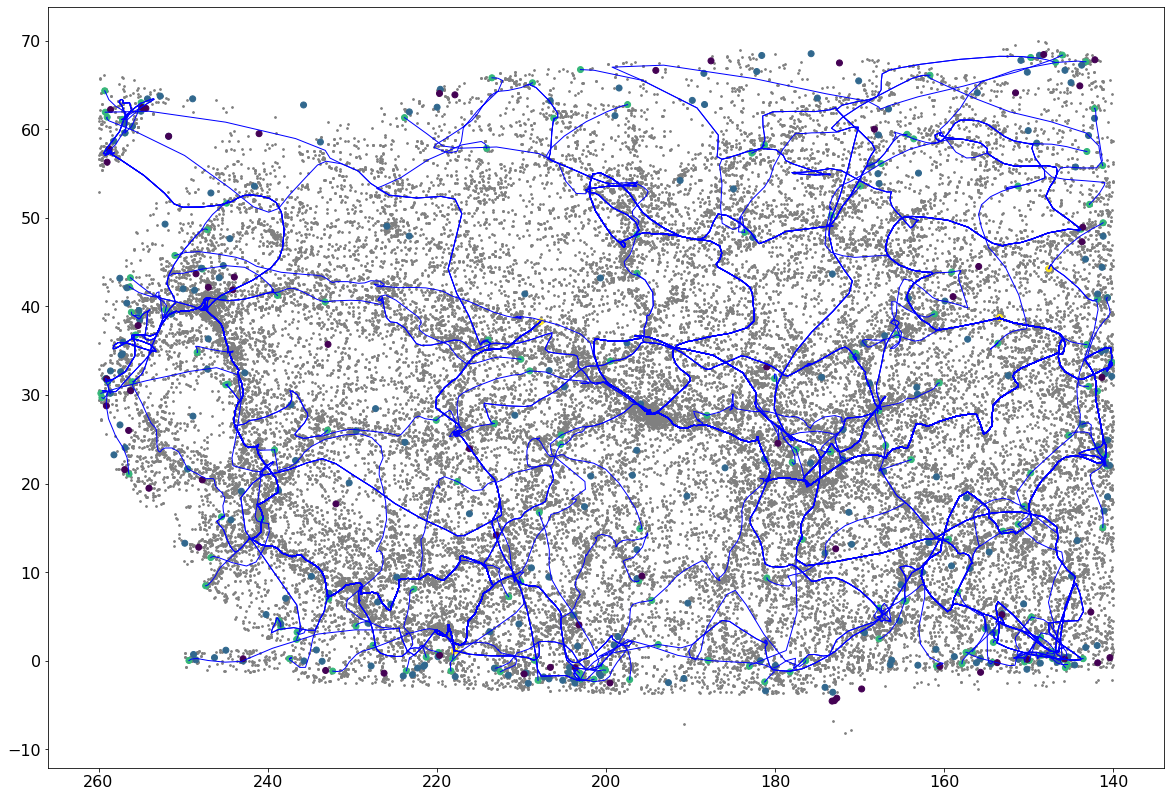

In [16]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(20, 14))

plt.scatter(coma['RA'], coma['DEC'], c='grey', s=3)

x = []
y = []
c = []
for cp in cps:
    x.append(cp['RA'])
    y.append(cp['DEC'])
    c.append(cp['type'])
plt.scatter(x, y, c=c)
    

for fil in tqdm(fils):
    points = fil['sample_points']
    x = []
    y = []
    for i in range(len(points)):
        x.append(points[i][0])
        y.append(points[i][1])
    plt.plot(x, y, 'b', linewidth=1)
ax = fig.get_axes()
ax[0].invert_xaxis()
# plt.savefig('smooth1_sig5.jpg')

In [17]:
center_ra = 194.9
center_dec = 28
radius = 10
big_radius = 40

In [18]:
cps[0]

{'RA': 217.879, 'DEC': 1.11756, 'Z': 0.0300819, 'type': 3}

In [19]:
fils[0]

{'CP1_id': 4,
 'CP2_id': 0,
 'sample_points': [(205.353, 24.4193, 0.0269166),
  (205.836, 23.5996, 0.0270427),
  (206.105, 22.7292, 0.027138),
  (206.3, 22.192, 0.0272297),
  (206.506, 22.0403, 0.0273063),
  (206.506, 21.7868, 0.027284),
  (206.318, 21.168, 0.0271457),
  (206.186, 20.582, 0.0269938),
  (206.326, 20.2195, 0.0268667),
  (206.668, 19.6715, 0.026718),
  (206.904, 18.9634, 0.0265668),
  (207.029, 18.3968, 0.0264232),
  (207.152, 18.0002, 0.026319),
  (207.555, 17.747, 0.0262901),
  (208.576, 17.3565, 0.0262379),
  (209.628, 16.7274, 0.0260585),
  (209.945, 16.2508, 0.0257657),
  (210.114, 16.1131, 0.0255646),
  (210.924, 15.9774, 0.0255856),
  (211.753, 15.5212, 0.0256471),
  (212.116, 14.9808, 0.0255865),
  (212.532, 14.2139, 0.0254662),
  (213.224, 12.8408, 0.0254058),
  (213.946, 11.5978, 0.0253915),
  (214.373, 11.1157, 0.0252716),
  (214.369, 10.9518, 0.0250054),
  (214.193, 10.7467, 0.0247222),
  (214.033, 10.306, 0.0245448),
  (213.814, 9.49727, 0.024473),
  (213.53,

In [20]:
len(cps)

477

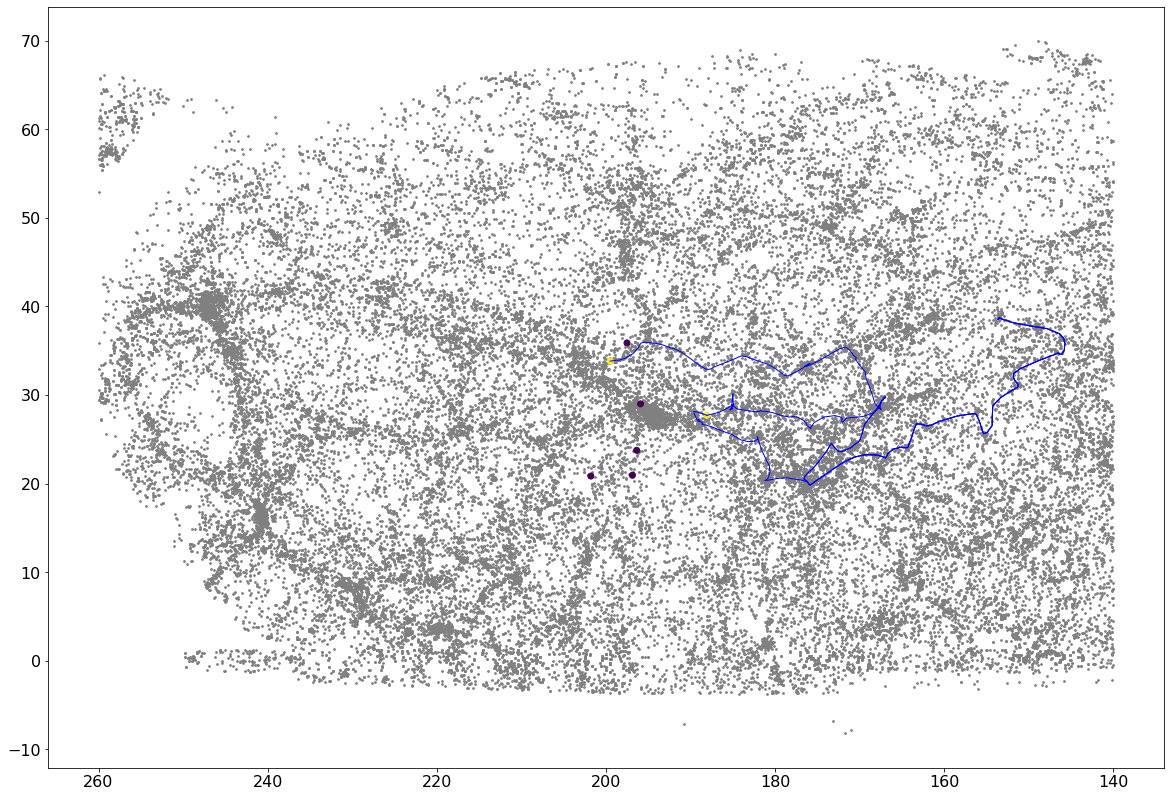

In [22]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(20, 14))

plt.scatter(coma['RA'], coma['DEC'], c='grey', s=3)

from collections import deque
q = deque()
for i in range(len(cps)):
    if ((cps[i]['RA'] - center_ra) ** 2 + (cps[i]['DEC'] - center_dec) ** 2) ** 0.5 < radius:
        q.append(i)
x = []
y = []
c = []
proc_points = set()
while not (len(q) == 0):
    cp_idx = q.popleft()
    cp = cps[cp_idx]
    x.append(cp['RA'])
    y.append(cp['DEC'])
    c.append(cp['type'])
    for fil in fils:
        if fil['CP1_id'] == cp_idx or fil['CP2_id'] == cp_idx:
            points = fil['sample_points']
            fil_x = []
            fil_y = []
            for i in range(len(points)):
                fil_x.append(points[i][0])
                fil_y.append(points[i][1])
            plt.plot(fil_x, fil_y, 'b', linewidth=1)
            
            if fil['CP1_id'] == cp_idx and fil['CP2_id'] not in proc_points:
                cp = cps[fil['CP2_id']]
                if ((cp['RA'] - center_ra) ** 2 + (cp['DEC'] - center_dec) ** 2) ** 0.5 < big_radius:
                    q.append(fil['CP2_id'])
            if fil['CP2_id'] == cp_idx and fil['CP1_id'] not in proc_points:
                cp = cps[fil['CP1_id']]
                if ((cp['RA'] - center_ra) ** 2 + (cp['DEC'] - center_dec) ** 2) ** 0.5 < big_radius:
                    q.append(fil['CP1_id'])
    proc_points.add(cp_idx)

plt.scatter(x, y, c=c)
ax = fig.get_axes()
ax[0].invert_xaxis()